In [1]:
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix

In [2]:
#mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

##np.vstack((a,b)) use this to create matrix
# y = [] should contain their classification. 

#mlp.fit(X_train,y_train)
#predictions = mlp.predict(X_test)
#print(classification_report(y_test,predictions))

In [3]:
class Object:
    
    def __init__():[]
   
    def __init__(self, SDSS_NAME, R, D, Z_VI, CLASS_P, p, mjd, fid,PSFMAG):
        #leaving out redshift for now
        R = round(R,2)
        D =  round(D,2)
        self.name = SDSS_NAME
        self.RA = R
        self.Dec = D
        self.z = Z_VI
        self.Class_p = CLASS_P
        self.Plate = p
        self.MJD = mjd
        self.FiberID = fid
        self.Mag = PSFMAG

Opening fits files

In [4]:
PLATEIDs = []
BinInfos = []
Flux = []
MJDs = []
###########3523############### NO OBJECTS MATCHED
#plate_3523 = fits.open('spPlate-3523-55144.fits')
#Bin_info_3523 = plate_3523[5].data
#Flux_3523 = plate_3523[0].data
#primhdu_3523 = plate_3523[0]
#PLATEIDs.append(primhdu_3523.header['PLATEID'])
#BinInfos.append(Bin_info_3523)

###########3537############### NO OBJECTS MATCHED
#plate_3537 = fits.open('spPlate-3537-55116.fits')
#Bin_info_3537 = plate_3537[5].data
#Flux_3537 = plate_3537[0].data
#primhdu_3537 = plate_3537[0]
#PLATEIDs.append(primhdu_3537.header['PLATEID'])
#BinInfos.append(Bin_info_3537)

###########4564###############
plate_4564 = fits.open('spPlate-4564-55570.fits',memmap=True)
Bin_info_4564 = plate_4564[5].data
Flux_4564 = plate_4564[0].data
primhdu_4564 = plate_4564[0]
PLATEIDs.append(primhdu_4564.header['PLATEID'])
MJDs.append(primhdu_4564.header['MJD'])
BinInfos.append(Bin_info_4564)
Flux.append(Flux_4564)
print(primhdu_4564.header['COEFF0'])


###########4775###############
plate_4775 = fits.open('spPlate-4775-55708.fits',memmap=True)
Bin_info_4775 = plate_4775[5].data
Flux_4775 = plate_4775[0].data
primhdu_4775 = plate_4775[0]
PLATEIDs.append(primhdu_4775.header['PLATEID'])
MJDs.append(primhdu_4775.header['MJD'])
BinInfos.append(Bin_info_4775)
Flux.append(Flux_4775)

###########5346###############
plate_5346 = fits.open('spPlate-5346-55955.fits',memmap=True)
Bin_info_5346 = plate_5346[5].data
Flux_5346 = plate_5346[0].data
primhdu_5346 = plate_5346[0]
PLATEIDs.append(primhdu_5346.header['PLATEID'])
MJDs.append(primhdu_5346.header['MJD'])
BinInfos.append(Bin_info_5346)
Flux.append(Flux_5346)

###########5718###############
plate_5718 = fits.open('spPlate-5718-56693.fits',memmap=True)
Bin_info_5718 = plate_5718[5].data
Flux_5718 = plate_5718[0].data
primhdu_5718 = plate_5718[0]
PLATEIDs.append(primhdu_5718.header['PLATEID'])
MJDs.append(primhdu_5718.header['MJD'])
BinInfos.append(Bin_info_5718)
Flux.append(Flux_5718)

###########6049###############
plate_6049 = fits.open('spPlate-6049-56091.fits',memmap=True)
Bin_info_6049 = plate_6049[5].data
Flux_6049 = plate_6049[0].data
primhdu_6049 = plate_6049[0]
PLATEIDs.append(primhdu_6049.header['PLATEID'])
MJDs.append(primhdu_6049.header['MJD'])
BinInfos.append(Bin_info_6049)
Flux.append(Flux_6049)

###########6391###############
plate_6391 = fits.open('spPlate-6391-56329.fits',memmap=True)
Bin_info_6391 = plate_6391[5].data
Flux_6391 = plate_6391[0].data
primhdu_6391 = plate_6391[0]
PLATEIDs.append(primhdu_6391.header['PLATEID'])
MJDs.append(primhdu_6391.header['MJD'])
BinInfos.append(Bin_info_6391)
Flux.append(Flux_6391)

###########6593###############
plate_6593 = fits.open('spPlate-6593-56270.fits',memmap=True)
Bin_info_6593 = plate_6593[5].data
Flux_6593 = plate_6593[0].data
primhdu_6593 = plate_6593[0]
PLATEIDs.append(primhdu_6593.header['PLATEID'])
MJDs.append(primhdu_6593.header['MJD'])
BinInfos.append(Bin_info_6593)
Flux.append(Flux_6593)

###########7036###############
plate_7036 = fits.open('spPlate-7036-56569.fits',memmap=True)
Bin_info_7036 = plate_7036[5].data
Flux_7036 = plate_7036[0].data
primhdu_7036 = plate_7036[0]
PLATEIDs.append(primhdu_7036.header['PLATEID'])
MJDs.append(primhdu_7036.header['MJD'])
BinInfos.append(Bin_info_7036)
Flux.append(Flux_7036)

###########7155###############
plate_7155 = fits.open('spPlate-7155-56629.fits',memmap=True)
Bin_info_7155 = plate_7155[5].data
Flux_7155 = plate_7155[0].data
primhdu_7155 = plate_7155[0]
PLATEIDs.append(primhdu_7155.header['PLATEID'])
MJDs.append(primhdu_7155.header['MJD'])
BinInfos.append(Bin_info_7155)
Flux.append(Flux_7155)

###########7164###############
plate_7164 = fits.open('spPlate-7164-56597.fits',memmap=True)
Bin_info_7164 = plate_7164[5].data
Flux_7164 = plate_7164[0].data
primhdu_7164 = plate_7164[0]
PLATEIDs.append(primhdu_7164.header['PLATEID'])
MJDs.append(primhdu_7164.header['MJD'])
BinInfos.append(Bin_info_7164)
Flux.append(Flux_7164)



###########7374###############
plate_7374 = fits.open('spPlate-7374-56751.fits',memmap=True)
Bin_info_7374 = plate_7374[5].data
Flux_7374 = plate_7374[0].data
primhdu_7374 = plate_7374[0]
PLATEIDs.append(primhdu_7374.header['PLATEID'])
MJDs.append(primhdu_7374.header['MJD'])
BinInfos.append(Bin_info_7374)
Flux.append(Flux_7374)


###########7454###############
plate_7454 = fits.open('spPlate-7454-56751.fits',memmap=True)
Bin_info_7454 = plate_7454[5].data
Flux_7454 = plate_7454[0].data
primhdu_7454 = plate_7454[0]
PLATEIDs.append(primhdu_7454.header['PLATEID'])
MJDs.append(primhdu_7454.header['MJD'])
BinInfos.append(Bin_info_7454)
Flux.append(Flux_7454)





3.551


In [5]:
PLATEIDs

[4564, 4775, 5346, 5718, 6049, 6391, 6593, 7036, 7155, 7164, 7374, 7454]

In [6]:
MJDs

[55570,
 55708,
 55955,
 56693,
 56091,
 56329,
 56270,
 56569,
 56629,
 56597,
 56751,
 56751]

In [7]:
list = fits.open('Superset_DR12Q.fits',memmap=True)#opening file
super=list[1].data # storing  BINTABLE extension data
CurrentPlate = 0
Full_Data=[]
Plate_Count =0
yes = 0

while Plate_Count < len(PLATEIDs):
    Current_Plate = PLATEIDs[Plate_Count]
    CurrentObject = 0
    platename_data = []
    while CurrentObject < len(super):
        Current = super[CurrentObject]
        if Current['PLATE'] == Current_Plate:
            Object_ = Object(Current['SDSS_NAME'], Current['RA'], Current['Dec'], 
                         Current['Z_VI'], Current['CLASS_PERSON'],Current['PLATE'] ,
                         Current['MJD'], Current['FIBERID'],Current['PSFMAG'])
            platename_data.append(Object_)
            yes = yes+1
        CurrentObject=CurrentObject+1    
    Plate_Count = Plate_Count + 1
    Full_Data.append(platename_data)
    
yes

2284

In [8]:
len(Full_Data)

12

Finding classifications of objects

In [9]:
Y = []
X = []
plate_no = 0
y=0

while plate_no < len(Full_Data):
    #loading matched objects with sup, plate data
    CurrentSup_data = Full_Data[plate_no]
    CurrentBin = BinInfos[plate_no]
    CurrentFlux = Flux[plate_no]
    #first object is zeroth element
    Sup_obj =0 
    while Sup_obj < len(CurrentSup_data):
        #to stop double counting
        no_match = True
        #looking at an object that has been matched in sup list
        CurrentSup = CurrentSup_data[Sup_obj]            
        #going through each object in the bin
        BinObj_No = 0
        while BinObj_No<len(CurrentBin):
            BinObj = CurrentBin[BinObj_No]
            ##checking if the two match 
            if BinObj['FIBERID'] == CurrentSup.FiberID:
                y=y+1
                if no_match:
                    if CurrentSup.Class_p == 0:
                        a=0
                        
                    
                    else:
                        
                        no_match = False
                        Y.append(CurrentSup.Class_p)
                        x_flux =(CurrentFlux[BinObj_No])
                        x_flux=x_flux[:4600]
                        X.append(x_flux)
            BinObj_No=BinObj_No+1  
        Sup_obj=Sup_obj+1
    plate_no = plate_no+1
    



In [10]:
PLATEIDs_test = []
BinInfos_test = []
Flux_test = []

#########4791############
plate_4791 = fits.open('spPlate-4791-55889.fits',memmap=True)
Bin_info_4791 = plate_4791[5].data
Flux_4791 = plate_4791[0].data
primhdu_4791 = plate_4791[0]
PLATEIDs_test.append(primhdu_4791.header['PLATEID'])
BinInfos_test.append(Bin_info_4791)
Flux_test.append(Flux_4791)


#########6970-############
plate_6970 = fits.open('spPlate-6970-56444.fits',memmap=True)
Bin_info_6970 = plate_6970[5].data
Flux_6970 = plate_6970[0].data
primhdu_6970 = plate_6970[0]
PLATEIDs_test.append(primhdu_6970.header['PLATEID'])
BinInfos_test.append(Bin_info_6970)
Flux_test.append(Flux_6970)



#########5852############
plate_5852 = fits.open('spPlate-5852-56034.fits',memmap=True)
Bin_info_5852 = plate_5852[5].data
Flux_5852 = plate_5852[0].data
primhdu_5852 = plate_5852[0]
PLATEIDs_test.append(primhdu_5852.header['PLATEID'])
BinInfos_test.append(Bin_info_5852)
Flux_test.append(Flux_5852)

In [11]:
##Putting all bins in one array 
plates = 0
Full_Test_Bin=[]
while plates< len(BinInfos_test):
    plate_element=0
    current_plates=BinInfos_test[plates]
    while plate_element< len(current_plates):
        Full_Test_Bin.append(current_plates[plate_element])
        plate_element=plate_element+1
        
    plates= plates+1

In [12]:
CurrentPlate_test = 0
Full_Data_test=[]
Plate_Count_test =0
yes_test = 0

while Plate_Count_test < len(PLATEIDs_test):
    Current_Plate_test = PLATEIDs[Plate_Count_test]
    CurrentObject_test = 0
    platename_test = []
    while CurrentObject_test < len(super):
        Current_test = super[CurrentObject_test]
        if Current_test['PLATE'] == Current_Plate_test:
            Object_test = Object(Current['SDSS_NAME'], Current['RA'], Current['Dec'], 
                         Current['Z_VI'], Current['CLASS_PERSON'],Current['PLATE'] ,
                         Current['MJD'], Current['FIBERID'], Current['PSFMAG'])
            platename_test.append(Object_test)
            yes_test = yes_test+1
        CurrentObject_test=CurrentObject_test+1    
    Plate_Count_test = Plate_Count_test + 1
    Full_Data_test.append(platename_test)
    
yes_test

602

In [22]:
Y_test = []
X_test = []
plate_no_test = 0
y=0
All_redshifts=[]
All_Mag=[]
while plate_no_test < len(Full_Data_test):
    #loading matched objects with sup, plate data
    CurrentSup_data_test = Full_Data[plate_no_test]
    CurrentBin_test = BinInfos_test[plate_no_test]
    CurrentFlux_test = Flux_test[plate_no_test]
    #first object is zeroth element
    Sup_obj_test =0 
    while Sup_obj_test < len(CurrentSup_data_test):
        #to stop double counting
        no_match_test = True
        #looking at an object that has been matched in sup list
        CurrentSup_test = CurrentSup_data_test[Sup_obj_test]            
        #going through each object in the bin
        BinObj_No_test = 0
        while BinObj_No_test<len(CurrentBin_test):
            BinObj_test = CurrentBin_test[BinObj_No_test]
            ##checking if the two match 
            if BinObj_test['FIBERID'] == CurrentSup_test.FiberID:
                y=y+1
                if no_match_test:
                    if CurrentSup_test.Class_p==0:
                        b=0
                    else:
                    
                        no_match_test = False
                        Y_test.append(CurrentSup_test.Class_p)
                        x_flux_test =(CurrentFlux_test[BinObj_No_test])
                        x_flux_test=x_flux_test[:4600]
                        X_test.append(x_flux_test)
                        All_redshifts.append(CurrentSup_test.z)
                        All_Mag.append(CurrentSup_test.Mag)
            BinObj_No_test=BinObj_No_test+1  
        Sup_obj_test=Sup_obj_test+1
    plate_no_test = plate_no_test+1
    


Solvers: 
‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(13),max_iter=500, solver = 'lbfgs',learning_rate_init=0.00001,activation='tanh') ##Think About

In [15]:
scaler = StandardScaler()  
scaler.fit(X)  
X = scaler.transform(X)  
X_test = scaler.transform(X_test)  

mlp.fit(X,Y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=13, learning_rate='constant',
       learning_rate_init=1e-05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
len(X_test[194])

4600

In [17]:
predictions = mlp.predict(np.array(X_test))

In [18]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.35      0.28      0.31       200
          3       0.54      0.36      0.43       322
          4       0.09      0.15      0.11        27
         30       0.06      0.26      0.10        39

avg / total       0.42      0.32      0.35       588



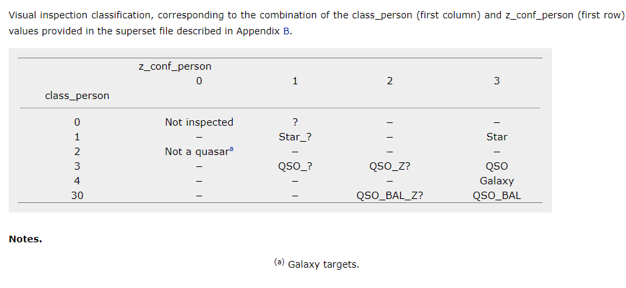

In [19]:
confusion_matrix(Y_test, predictions)

array([[ 56,  71,  18,  55],
       [ 90, 116,  21,  95],
       [  2,  17,   4,   4],
       [ 14,  11,   4,  10]])

In [30]:
i=0
performance_q1 = []
performance_q2 = []
Yes_quasar=[]
Yes_gal=[]
Yes_star=[]
Yes_bal=[]
no_quasar=[]
no_gal=[]
no_star=[]
no_bal=[]
no_quasar_class=[]
no_gal_class=[]
no_star_class=[]
no_bal_class=[]

while i< len(predictions):
    current_pred= predictions[i]
    current_cla = Y_test[i] 
    if current_pred == current_cla:
        if current_cla==1:
            Yes_star.append(i)
            
        elif current_cla==3:
            Yes_quasar.append(i)
            performance_q1.append(1)
        
        elif current_cla==4:
            Yes_gal.append(i)
            
            
            
        elif current_cla==30:
            Yes_bal.append(i)
    else:
        if current_cla==1:
            no_star.append(i)
            no_star_class.append(current_pred)

            
        elif current_cla==3:
            no_quasar.append(i)
            no_quasar_class.append(current_pred)
            performance_q2.append(0)
        
        elif current_cla==4:
            no_gal.append(i)
            no_gal_class.append(current_pred)
            
        elif current_cla==30:
            no_bal.append(i)
            no_bal_class.append(current_pred)
    i=i+1

In [31]:
Yes_z = []
No_z =[]
n=0

while n< len(Yes_quasar):
    current_element = Yes_quasar[n]
    Yes_z.append(All_redshifts[current_element])
    n=n+1

n=0
while n< len(no_quasar):
    current_element = no_quasar[n]
    No_z.append(All_redshifts[current_element])
    n=n+1




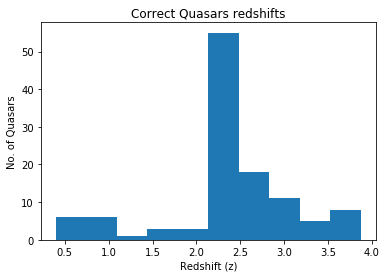

In [32]:
plt.hist(Yes_z)
plt.xlabel('Redshift (z)')
plt.ylabel('No. of Quasars')
plt.title('Correct Quasars redshifts')
plt.show()

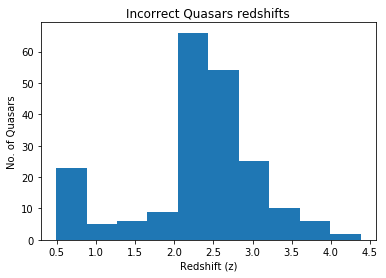

In [33]:
plt.hist(No_z)
plt.xlabel('Redshift (z)')
plt.ylabel('No. of Quasars')
plt.title('Incorrect Quasars redshifts')
plt.show()

In [28]:
All_Mag[7]

array([ 17.70147705,  17.41287422,  17.30308914,  17.11568832,  17.12657166], dtype=float32)

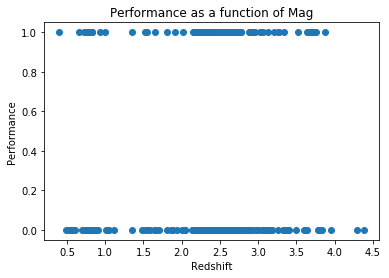

In [34]:
#plt.plot(All_Mag, performance)
#plt.xlabel('Mag')
plt.plot(Yes_z+No_z, performance_q1+performance_q2,"o")
plt.xlabel('Redshift')
plt.ylabel('Performance')
plt.title('Performance as a function of Mag')
plt.show()

In [ ]:
rf = RandomForestClassifier(max_depth=40, random_state=0)

In [ ]:
rf.fit(X,Y)

In [ ]:
predictions_rf = rf.predict(X_test)

In [ ]:
print(classification_report(Y_test,predictions_rf))